Модуль 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pydub import AudioSegment

C:\Users\user7\anaconda3\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


1. Загрузка данных

1.1. Загрузка снимков. Загружены все исходные изображения. 

In [2]:
import cv2
import os

In [3]:
images = []
for filename in os.listdir("images"):
    img = cv2.imread(os.path.join("images",filename))
    if img is not None:
        images.append(img)

In [4]:
len(images)

227

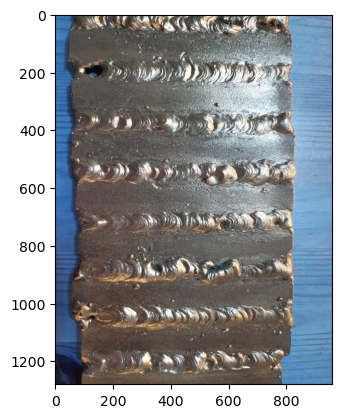

In [5]:
imgplot = plt.imshow(images[0])
plt.show()

1.2 Расширение набора данных. Набор данных расширен за счет добавления похожих снимков с результатами контроля, найденных в сети Интернет. Для каждого указанного дефекта найдено не менее 5 снимков.

In [6]:
data = pd.read_csv("weld_defects.csv", index_col=False)

C:\Users\user7\AppData\Local\Temp\ipykernel_21880\1978144449.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  data = pd.read_csv("weld_defects.csv", index_col=False)


In [7]:
data

,ФИО,Должность,Вид сварки,Тип покрытия электрода,Марка электрода,Диаметр электрода,Тип соединения,Пространственное положение сварки,Сила тока,Ссылка на изображение,Ссылка на аннотированное изображение,дефекты,время
0,Шабельников С.Н.,РП,111,основное,УОНИ 1355,2.5мм,стыковое,нижнее,76А,images/5.jpg,https://drive.google.com/file/d/11PThhOpmOsSpO...,"Прожог 1: (459, 238) - (508, 297) \nПрожог 2: ...",2024-06-15
1,Шабельников С.Н.,РП,111,основное,УОНИ 1355,2.5мм,стыковое,нижнее,76А,images/6.jpg,https://drive.google.com/file/d/1tSUgf3mI4dt66...,"Прожог 1: (470, 1) - (522, 40) \nНаплыв 1: (47...",2024-06-15
2,Шабельников С.Н.,РП,111,основное,УОНИ 1355,2.5мм,стыковое,нижнее,76А,images/7.jpg,https://drive.google.com/file/d/1xauBc6PSKTXKZ...,"Поры 1: (129, 320) - (157, 345) \nПоры 2: (126...",2024-06-15
3,Шабельников С.Н.,РП,111,основное,УОНИ 1355,2.5мм,стыковое,нижнее,76А,images/8.jpg,https://drive.google.com/file/d/1seh4GmqrMnKVN...,"Прожог 1: (143, 220) - (223, 268) \nПрожог 2: ...",2024-06-15
4,Шабельников С.Н.,РП,111,основное,УОНИ 1355,2.5мм,стыковое,нижнее,76А,images/10.jpg,https://drive.google.com/file/d/1ZkiNAccPE9X-j...,"Прожог 1: (53, 43) - (123, 77) \nПоры 1: (49, ...",2024-06-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Шабельников С.Н.,РП,111,основное,уонии 1355,2.5,стыковое,нижнее,80,images/237.jpg,https://drive.google.com/file/d/1RrWa_oK-1UoWE...,0,2024-06-16
223,Шабельников С.Н.,РП,111,основное,уонии 1355,2.5,стыковое,нижнее,80,images/238.jpg,https://drive.google.com/file/d/1BQFssbJMawTAh...,"Брызги 1: (155, 297) - (173, 316) \nБрызги 2: ...",2024-06-16
224,Шабельников С.Н.,РП,111,основное,уонии 1355,2.5,стыковое,нижнее,80,images/240.jpg,https://drive.google.com/file/d/1toiLohPB8W_JS...,0,2024-06-17
225,Шабельников С.Н.,РП,111,основное,уонии 1355,2.5,стыковое,нижнее,80,images/241.jpg,https://drive.google.com/file/d/1tBTvRjDa7aB-l...,"Шлаковые включения 1: (268, 137) - (298, 174) ...",2024-06-17


In [8]:
err = {}
for d in data["дефекты"]:
    if d == '0':
        continue
    dd = d.split('\n')
    for s in dd:
        e = s.split(' ')
        if not e[0] in err:
            err[e[0]] = 1
        else:
            err[e[0]] += 1

In [9]:
err

{'Прожог': 27,
 'Непровар': 138,
 'Поры': 76,
 'Кратер': 9,
 'Наплыв': 43,
 'Брызги': 457,
 'Шлаковые': 82,
 'Подрез': 87,
 'Трещина': 2}

In [10]:
for filename in os.listdir("imadd"):
    img = cv2.imread(os.path.join("imadd",filename))
    if img is not None:
        images.append(img)

In [11]:
len(images)

272

1.3. Загружены файлы, содержащие акустические данные, полученные с образцов с дефектами и без.

In [12]:
audios = []
srs = []
for filename in os.listdir("sounds"):
    audio = AudioSegment.from_file(os.path.join("sounds",filename), format='m4a')
    if audio is not None:
        audios.append(audio)

2. Предобработка данных

In [14]:
types={
    'Прожог': '7',
     'Непровар': '6',
     'Поры': '5',
     'Кратер': '4',
     'Наплыв': '2',
     'Брызги': '1',
     'Шлаковые': '0',
     'Подрез': '3',
     'Трещина': '8'
}

In [15]:
errors = []
i = 1
for d in range(len(data["дефекты"])):
    if data["дефекты"][d] == '0':
        i += 1
        continue
    d1 = data["дефекты"][d]
    d1 = d1.replace('(','')
    d1 = d1.replace(')','')
    d1 = d1.replace('Шлаковые включения', 'Шлаковые')
    dd = d1.split('\n')
    for s in dd:
        e = s.split(' ')
        errors.append([data["Ссылка на изображение"][d].replace('images/','').replace('.jpg',''), types[e[0]], e[2] + e[3], e[5] + e[6]])
        if not e[0] in err:
            err[e[0]] = 1
        else:
            err[e[0]] += 1
    i += 1

In [16]:
errors

[['5', '7', '459,238', '508,297'],
 ['5', '7', '467,310', '518,355'],
 ['5', '6', '382,149', '415,302'],
 ['5', '6', '389,339', '411,374'],
 ['5', '6', '580,20', '597,73'],
 ['5', '6', '488,21', '508,112'],
 ['5', '6', '388,21', '412,66'],
 ['5', '6', '287,25', '310,54'],
 ['5', '6', '184,25', '211,54'],
 ['5', '6', '88,32', '112,50'],
 ['5', '6', '88,125', '117,286'],
 ['5', '6', '197,338', '224,376'],
 ['5', '6', '197,303', '225,322'],
 ['5', '6', '562,280', '595,309'],
 ['5', '6', '561,336', '588,377'],
 ['5', '6', '388,69', '410,142'],
 ['5', '6', '296,131', '315,151'],
 ['5', '6', '485,120', '498,230'],
 ['5', '6', '577,93', '587,248'],
 ['5', '6', '388,304', '409,338'],
 ['5', '6', '492,298', '502,310'],
 ['5', '6', '490,364', '501,380'],
 ['5', '6', '306,253', '316,279'],
 ['5', '6', '290,263', '298,278'],
 ['5', '5', '293,198', '313,212'],
 ['5', '5', '292,114', '308,127'],
 ['5', '5', '293,56', '315,76'],
 ['5', '5', '295,94', '310,109'],
 ['5', '5', '194,137', '209,156'],
 ['

2.1. Выполнена разметка неразмеченных данных по типу дефекта.

In [18]:
for filename in os.listdir("cdata"):
    with open(os.path.join("cdata",filename)) as f:
        lines = f.readlines()
        for line in lines:
            line.replace('\n', '')
            s = line.split(' ')
            height, width, _ = images[i - 1].shape
            w0 = float(s[1])
            w1 = float(s[2])
            h0 = float(s[3])
            h1 = float(s[4])
            errors.append([i, s[0], str(int(w0 * width)) + ',' + str(int(h0 * height)), str(int(w1 * width)) + ',' + str(int(h1 * height))])
        i += 1

In [19]:
s

['1', '0.098818', '0.442242', '0.060811', '0.121197']

In [20]:
errors

[['5', '7', '459,238', '508,297'],
 ['5', '7', '467,310', '518,355'],
 ['5', '6', '382,149', '415,302'],
 ['5', '6', '389,339', '411,374'],
 ['5', '6', '580,20', '597,73'],
 ['5', '6', '488,21', '508,112'],
 ['5', '6', '388,21', '412,66'],
 ['5', '6', '287,25', '310,54'],
 ['5', '6', '184,25', '211,54'],
 ['5', '6', '88,32', '112,50'],
 ['5', '6', '88,125', '117,286'],
 ['5', '6', '197,338', '224,376'],
 ['5', '6', '197,303', '225,322'],
 ['5', '6', '562,280', '595,309'],
 ['5', '6', '561,336', '588,377'],
 ['5', '6', '388,69', '410,142'],
 ['5', '6', '296,131', '315,151'],
 ['5', '6', '485,120', '498,230'],
 ['5', '6', '577,93', '587,248'],
 ['5', '6', '388,304', '409,338'],
 ['5', '6', '492,298', '502,310'],
 ['5', '6', '490,364', '501,380'],
 ['5', '6', '306,253', '316,279'],
 ['5', '6', '290,263', '298,278'],
 ['5', '5', '293,198', '313,212'],
 ['5', '5', '292,114', '308,127'],
 ['5', '5', '293,56', '315,76'],
 ['5', '5', '295,94', '310,109'],
 ['5', '5', '194,137', '209,156'],
 ['

2.3 Сформирован и сохранен итоговый набор снимков с целевой переменной (в формате архива .zip).

In [21]:
import zipfile
import json

In [22]:
i = 1
c = str(len(images))
with zipfile.ZipFile('data.zip', 'w') as zip_file:
    for img in images:
        zip_file.writestr(str(i) + '.jpg', cv2.imencode('.jpg', img)[1].tobytes())
        i += 1
    zip_file.writestr('var.txt', json.dumps(errors))
    zip_file.writestr('count.txt', c)

2.4. Выгрузка данных из файла

In [23]:
import io

In [24]:
i = 1
rimages = []
with zipfile.ZipFile("data.zip") as zf:
    file = zf.read('var.txt')
    rerrors = json.loads(file)
    count = int(zf.read('count.txt'))
    while i <= count:
        img = zf.read(str(i) + '.jpg')
        rimages.append(cv2.imdecode(np.frombuffer(img, np.uint8), 1))
        i += 1
errors

[['5', '7', '459,238', '508,297'],
 ['5', '7', '467,310', '518,355'],
 ['5', '6', '382,149', '415,302'],
 ['5', '6', '389,339', '411,374'],
 ['5', '6', '580,20', '597,73'],
 ['5', '6', '488,21', '508,112'],
 ['5', '6', '388,21', '412,66'],
 ['5', '6', '287,25', '310,54'],
 ['5', '6', '184,25', '211,54'],
 ['5', '6', '88,32', '112,50'],
 ['5', '6', '88,125', '117,286'],
 ['5', '6', '197,338', '224,376'],
 ['5', '6', '197,303', '225,322'],
 ['5', '6', '562,280', '595,309'],
 ['5', '6', '561,336', '588,377'],
 ['5', '6', '388,69', '410,142'],
 ['5', '6', '296,131', '315,151'],
 ['5', '6', '485,120', '498,230'],
 ['5', '6', '577,93', '587,248'],
 ['5', '6', '388,304', '409,338'],
 ['5', '6', '492,298', '502,310'],
 ['5', '6', '490,364', '501,380'],
 ['5', '6', '306,253', '316,279'],
 ['5', '6', '290,263', '298,278'],
 ['5', '5', '293,198', '313,212'],
 ['5', '5', '292,114', '308,127'],
 ['5', '5', '293,56', '315,76'],
 ['5', '5', '295,94', '310,109'],
 ['5', '5', '194,137', '209,156'],
 ['

Модуль 2

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import librosa
import zipfile
import json
import io
import cv2
from numpy.linalg import norm
import os
from scipy.fft import fft, fftfreq, ifft
import random

In [26]:
i = 1
images = []
with zipfile.ZipFile("data.zip") as zf:
    file = zf.read('var.txt')
    errors = json.loads(file)
    count = int(zf.read('count.txt'))
    while i <= count:
        img = zf.read(str(i) + '.jpg')
        images.append(cv2.imdecode(np.frombuffer(img, np.uint8), 1))
        i += 1
errors

[['5', '7', '459,238', '508,297'],
 ['5', '7', '467,310', '518,355'],
 ['5', '6', '382,149', '415,302'],
 ['5', '6', '389,339', '411,374'],
 ['5', '6', '580,20', '597,73'],
 ['5', '6', '488,21', '508,112'],
 ['5', '6', '388,21', '412,66'],
 ['5', '6', '287,25', '310,54'],
 ['5', '6', '184,25', '211,54'],
 ['5', '6', '88,32', '112,50'],
 ['5', '6', '88,125', '117,286'],
 ['5', '6', '197,338', '224,376'],
 ['5', '6', '197,303', '225,322'],
 ['5', '6', '562,280', '595,309'],
 ['5', '6', '561,336', '588,377'],
 ['5', '6', '388,69', '410,142'],
 ['5', '6', '296,131', '315,151'],
 ['5', '6', '485,120', '498,230'],
 ['5', '6', '577,93', '587,248'],
 ['5', '6', '388,304', '409,338'],
 ['5', '6', '492,298', '502,310'],
 ['5', '6', '490,364', '501,380'],
 ['5', '6', '306,253', '316,279'],
 ['5', '6', '290,263', '298,278'],
 ['5', '5', '293,198', '313,212'],
 ['5', '5', '292,114', '308,127'],
 ['5', '5', '293,56', '315,76'],
 ['5', '5', '295,94', '310,109'],
 ['5', '5', '194,137', '209,156'],
 ['

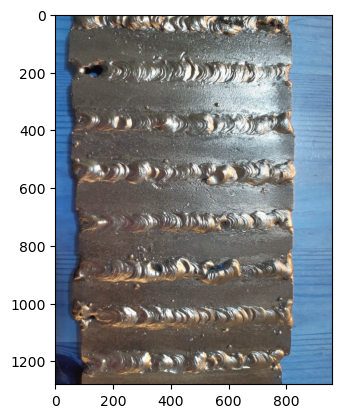

In [27]:
imgplot = plt.imshow(images[0])
plt.show()

1. Анализ и корректировка изображений

1.1. Построены гистограммы распределения пикселей по яркости и цветовым компонентам, сделана коррекция гистограммы.

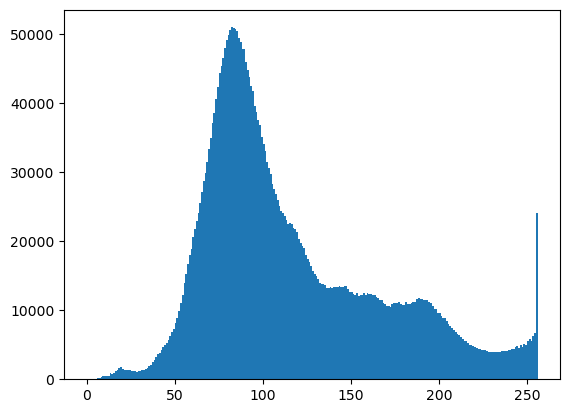

In [28]:
plt.hist(images[0].ravel(),256,[0,256])
plt.show()

In [29]:
hist1 = cv2.calcHist([images[0]],[0],None,[256],[0,256]) #blue
hist2 = cv2.calcHist([images[0]],[1],None,[256],[0,256]) # green
hist3 = cv2.calcHist([images[0]],[2],None,[256],[0,256]) # red

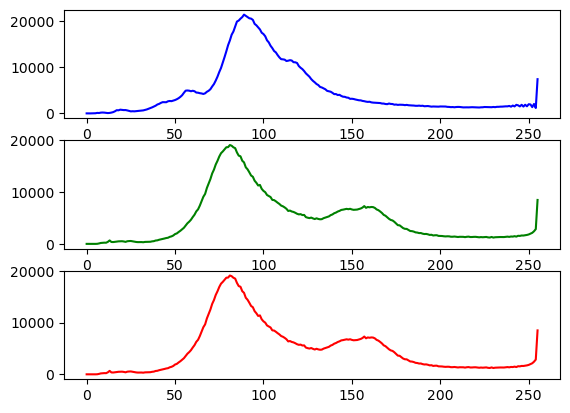

In [31]:
plt.subplot(3,1,1), plt.plot(hist1, color='b')
plt.subplot(3,1,2), plt.plot(hist2, color='g')
plt.subplot(3,1,3), plt.plot(hist2, color='r')
plt.show()

In [32]:
gimg = cv2.cvtColor(images[0], cv2.COLOR_BGR2GRAY)

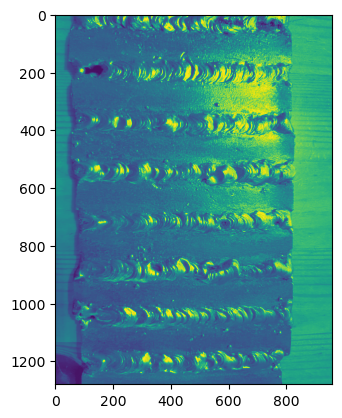

In [33]:
imgplot = plt.imshow(gimg)
plt.show()

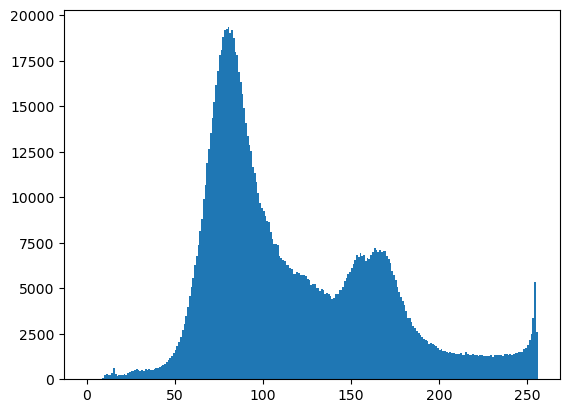

In [34]:
plt.hist(gimg.ravel(),256,[0,256])
plt.show()

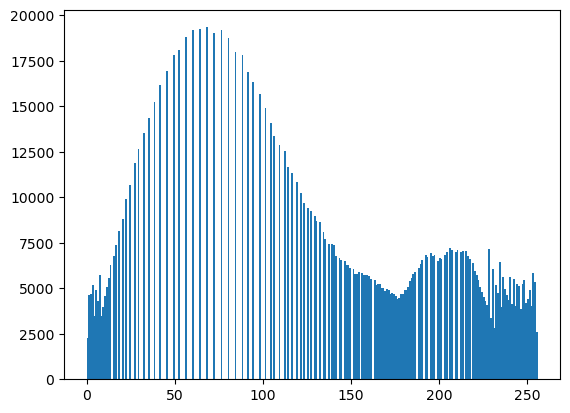

In [35]:
equ = cv2.equalizeHist(gimg)
plt.hist(equ.ravel(),256,[0,256])
plt.show()

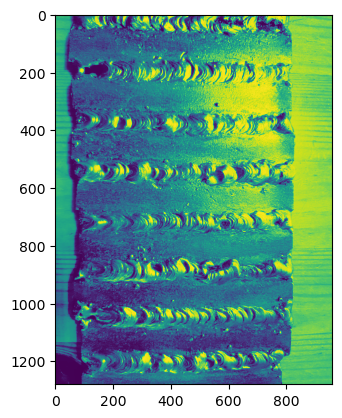

In [36]:
imgplot = plt.imshow(equ)
plt.show()

1.3. Проведение сглаживания изображений

In [37]:
for i in range(len(images)):
    images[i] = cv2.blur(images[i],(5,5))

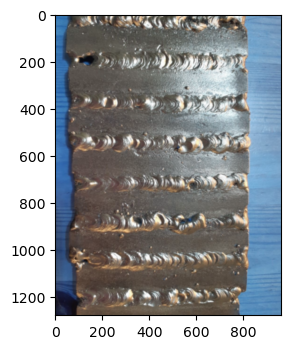

In [38]:
plt.subplot(122)
plt.imshow(images[0])
plt.show()

1.4. Разработан и реализован алгоритм проверки качества снимков (например, не сфокусировано изображение, засвеченное изображение, фото с недостаточной освещенностью и т.п.).

In [39]:
df = pd.DataFrame(errors)
df

,0,1,2,3
0,5,7,"459,238","508,297"
1,5,7,"467,310","518,355"
2,5,6,"382,149","415,302"
3,5,6,"389,339","411,374"
4,5,6,"580,20","597,73"
...,...,...,...,...
1011,270,1,"179,7","590,5"
1012,271,1,"420,41","363,100"
1013,271,1,"339,19","292,51"
1014,271,1,"185,16","207,48"


In [40]:
ind = []
for i in range(len(images)):
    if np.average(norm(images[i], axis=2)) / np.sqrt(3) > 200 or np.average(norm(images[i], axis=2)) / np.sqrt(3) < 50:
        ind.append(i)

In [41]:
for i in sorted(ind, reverse=True):
    del images[i]

In [42]:
df = df.drop(np.where(df[0] in ind)[0])

C:\Users\user7\AppData\Local\Temp\ipykernel_21880\4283380303.py:1: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  df = df.drop(np.where(df[0] in ind)[0])


2. Анализ акустических файлов

In [43]:
audios = []
srs = []
for filename in os.listdir("sounds"):
    audio, sr = librosa.load(os.path.join("sounds",filename), mono=True)
    if audio is not None:
        audios.append(audio)
        srs.append(sr)

2.2 Проведен частотно-временной анализ каждого сигнала (с дефектом и без).

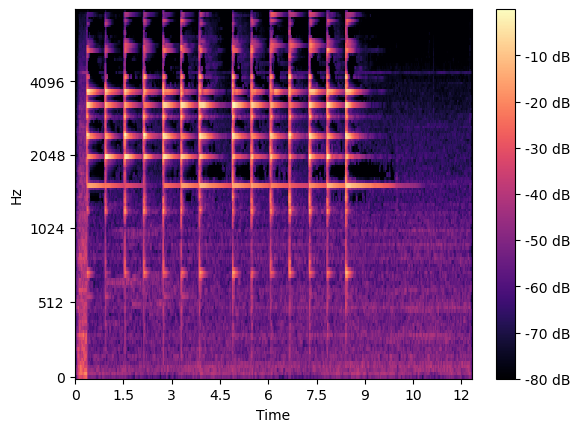

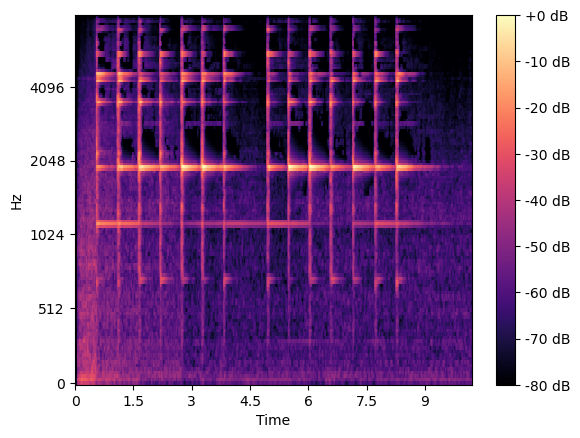

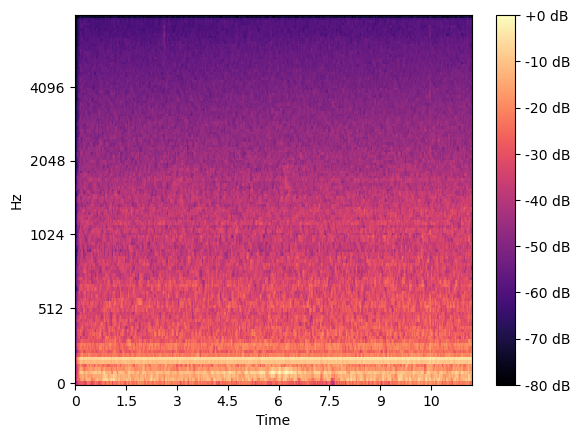

In [44]:
for i in [0, 15, len(audios) - 1]:
    S = librosa.feature.melspectrogram(y=audios[i], sr=srs[i])
    fig, ax = plt.subplots()
    S_dB = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_dB, x_axis='time',
                             y_axis='mel', sr=sr,
                             fmax=8000, ax=ax)
    fig.colorbar(img, ax=ax, format='%+2.0f dB')

2.3. Выявлены характеристики сигнала, позволяющие определить наличие дефектов.

2.4. Определены информативные частоты для определения наличия дефектов.

2.1. Проведено Фурье-преобразование каждого акустического сигнала (с дефектом и без).

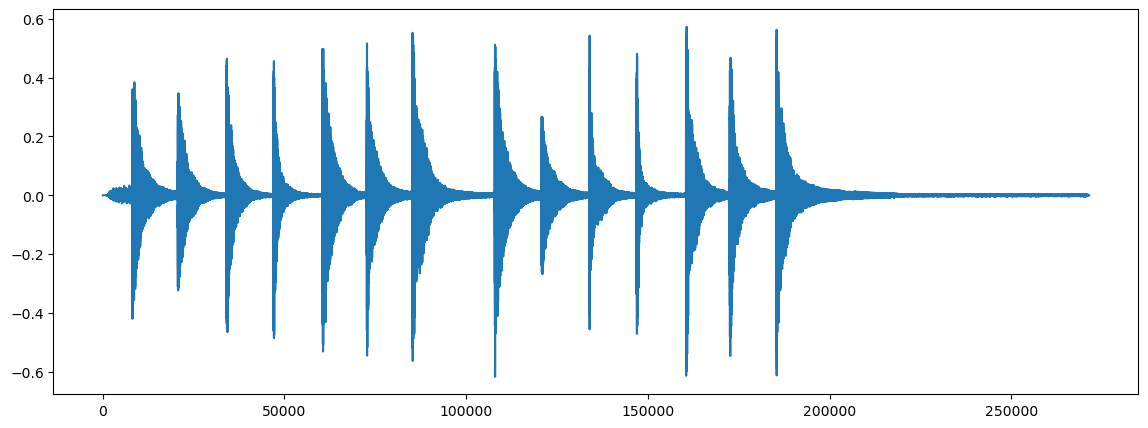

In [45]:
plt.figure(figsize=(14, 5))
display(plt.plot(audios[0]))

In [46]:
yf = fft(audios[0])
xf = fftfreq(len(audios[0]), 1 / srs[0])

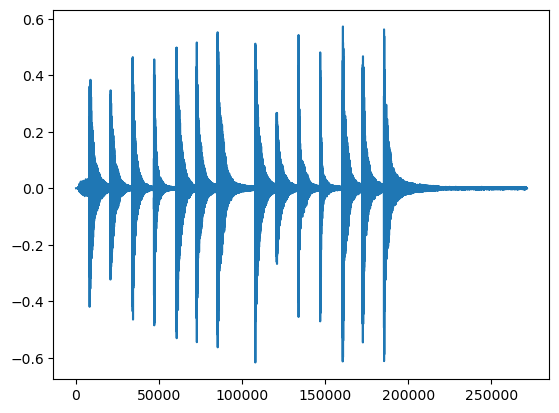

In [48]:
new_sig = ifft(fft(audios[0]))
plt.plot(new_sig)

In [49]:
for i in range(len(audios)):
    audios[i] = ifft(fft(audios[0]))

3. Сегментация изображений

3.4. Проведена бинаризация изображений.

In [50]:
ths = []
for i in images:
    gimg = cv2.cvtColor(images[0], cv2.COLOR_BGR2GRAY)
    ths.append(cv2.adaptiveThreshold(gimg,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2))

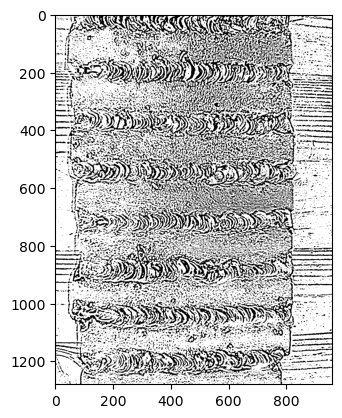

In [51]:
plt.imshow(ths[0],'gray')

4. Расширение набора данных с помощью методов аугментации

4.1. Выполнены и визуализированы зеркальные отражения.

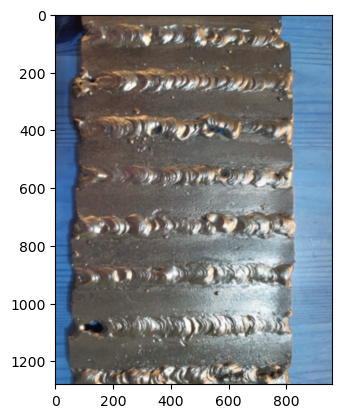

In [52]:
img = cv2.flip(images[0], 0)
plt.imshow(img)

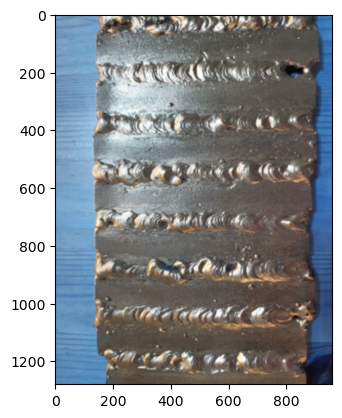

In [53]:
img = cv2.flip(images[0], 1)
plt.imshow(img)

In [54]:
for i in range(len(images)):
    if i % 4 == 2:
        img = cv2.flip(images[i], 0)
        images.append(img)
        dd = df[df[0] == i]
        list = dd.values.tolist()
        ndf = []
        for l in list:
            c = l[2]
            height, width, _ = images[l[0] - 1].shape
            s0 = c.split(',')
            x1 = str(width - int(s0[0]))
            c = l[3]
            s1 = c.split(',')
            x0 = str(width - int(s1[0]))
            ndf.append([l[0], l[1], str(x0) + ',' + s0[1], str(x1) + ',' + s1[1]])
        dd.loc[dd[0] == i, 0] = len(images)
        df = pd.concat([df, pd.DataFrame(ndf)], ignore_index=True)
    if i % 4 == 3:
        img = cv2.flip(images[i], 1)
        images.append(img)
        dd = df[df[0] == i]
        list = dd.values.tolist()
        ndf = []
        for l in list:
            c = l[2]
            height, width, _ = images[l[0] - 1].shape
            s0 = c.split(',')
            y1 = str(width - int(s0[1]))
            c = l[3]
            s1 = c.split(',')
            y0 = str(width - int(s1[1]))
            ndf.append([l[0], l[1], s0[0] + ',' + str(y0), s1[0] + ',' + str(y1)])
        dd.loc[dd[0] == i, 0] = len(images)
        df = pd.concat([df, pd.DataFrame(ndf)], ignore_index=True)

C:\Users\user7\AppData\Local\Temp\ipykernel_21880\2620282331.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd.loc[dd[0] == i, 0] = len(images)
C:\Users\user7\AppData\Local\Temp\ipykernel_21880\2620282331.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd.loc[dd[0] == i, 0] = len(images)
C:\Users\user7\AppData\Local\Temp\ipykernel_21880\2620282331.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd.loc[dd[0] == i, 0] = l

In [55]:
df

,0,1,2,3
0,5,7,"459,238","508,297"
1,5,7,"467,310","518,355"
2,5,6,"382,149","415,302"
3,5,6,"389,339","411,374"
4,5,6,"580,20","597,73"
...,...,...,...,...
1056,270,1,"110,7","521,5"
1057,271,1,"420,700","363,759"
1058,271,1,"339,749","292,781"
1059,271,1,"185,752","207,784"


4.4. Выполнена и визуализированы смена яркости.

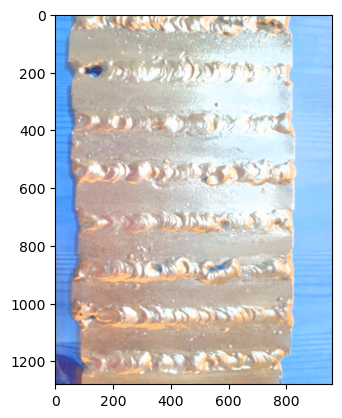

In [56]:
hsv = cv2.cvtColor(images[0], cv2.COLOR_BGR2HSV)
value = 100 #whatever value you want to add
hsv[:,:,2] = cv2.add(hsv[:,:,2], value)
image = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
plt.imshow(image,'gray')

In [57]:
for i in range(len(images)):
    if i % 2 == 0:
        hsv = cv2.cvtColor(images[i], cv2.COLOR_BGR2HSV)
        value = random.randint(10, 100)
        hsv[:,:,2] = cv2.add(hsv[:,:,2], value)
        image = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
        images.append(image)
        dd = df[df[0] == i]
        dd.loc[dd[0] == i, 0] = len(images)
        df = pd.concat([df, dd], ignore_index=True)

In [58]:
df

,0,1,2,3
0,5,7,"459,238","508,297"
1,5,7,"467,310","518,355"
2,5,6,"382,149","415,302"
3,5,6,"389,339","411,374"
4,5,6,"580,20","597,73"
...,...,...,...,...
1135,544,1,"205,7","476,10"
1136,544,1,"182,7","459,6"
1137,544,1,"218,7","435,9"
1138,544,1,"216,12","498,8"


4.5. Выполнена и визуализированы смена контрастности.

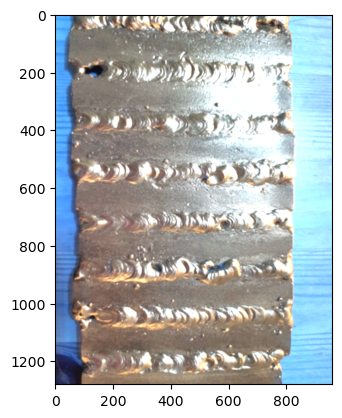

In [59]:
out = cv2.addWeighted(images[0], 1.5, images[0], 0, 0)
plt.imshow(out,'gray')

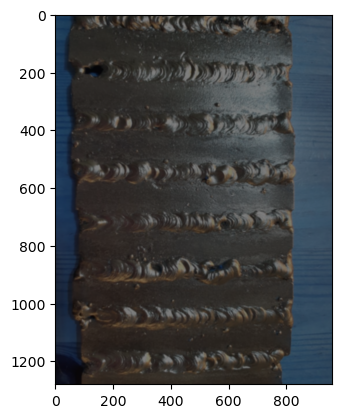

In [60]:
out = cv2.addWeighted(images[0], 0.5, images[0], 0, 0)
plt.imshow(out,'gray')

In [61]:
for i in range(len(images)):
    if i % 4 == 0:
        out = cv2.addWeighted(images[i], 1.5, images[i], 0, 0)
        images.append(out)
        dd = df[df[0] == i]
        dd.loc[dd[0] == i, 0] = len(images)
        df = pd.concat([df, dd], ignore_index=True)
    if i % 4 == 1:
        out = cv2.addWeighted(images[i], 0.5, images[i], 0, 0)
        images.append(out)
        dd = df[df[0] == i]
        dd.loc[dd[0] == i, 0] = len(images)
        df = pd.concat([df, dd], ignore_index=True)

In [63]:
df

,0,1,2,3
0,5,7,"459,238","508,297"
1,5,7,"467,310","518,355"
2,5,6,"382,149","415,302"
3,5,6,"389,339","411,374"
4,5,6,"580,20","597,73"
...,...,...,...,...
1235,885,1,"205,7","476,10"
1236,885,1,"182,7","459,6"
1237,885,1,"218,7","435,9"
1238,885,1,"216,12","498,8"


5. Формирование итогового набора расширенных и предобработанных данных

5.1. Cформирован итоговый набор расширенных и предобработанных данных.

5.2. Итоговый набор расширенных и предобработанных данных содержит разметку для всех сгенерированных изображений.

5.3. Итоговый набор данных изображений и разметок сохранен в архив с расширением .zip

In [65]:
import zipfile
import json

In [66]:
i = 1
c = str(len(images))
with zipfile.ZipFile('data2.zip', 'w') as zip_file:
    zip_file.writestr('var.txt', json.dumps(df.values.tolist()))
    for img in images:
        zip_file.writestr(str(i) + '.jpg', cv2.imencode('.jpg', img)[1].tobytes())
        i += 1
    zip_file.writestr('count.txt', c)

In [67]:
df

,0,1,2,3
0,5,7,"459,238","508,297"
1,5,7,"467,310","518,355"
2,5,6,"382,149","415,302"
3,5,6,"389,339","411,374"
4,5,6,"580,20","597,73"
...,...,...,...,...
1235,885,1,"205,7","476,10"
1236,885,1,"182,7","459,6"
1237,885,1,"218,7","435,9"
1238,885,1,"216,12","498,8"


6. Подготовка итоговой версии технического задания (ТЗ)

6.1. Техническое задание скорректировано с учетом встречи с экспертом по неразрушающему контролю (дефектоскопистом) – учтены требования по ВИК (визуально-измерительный контроль).

Правки были внесены в отчет

6.2. Техническое задание скорректировано с учетом встречи с экспертом по программным решениям для бизнеса – учтены требования к API  для интеграции с программным продуктом.

Правки были внесены в отчет

Выводы

1. В ходе выполнения работы были построены гистограммы для первого изображения и выполнена их коррекция. 
2. Изображения были сглажены встроенным в cv2 методом blur
3. Было проведено разделение файлов на файлы с нормальной освещенностью и засвеченные / слишком темные, негодные изображения были отброшены
4. Было проведено фурье преобразование аудифойлов методами из библиотеки scipy
5. Был проведен частотно-временной анализ файлов и было выявлено что файлы с дефектами отличаются мощностью в полосе частот 2048-4096
6. Была проведена бинаризация изображения методом гауссовой бинаризации
7. Были добавлены 50% от исходных изображений с повышенной яркостью
8. Были добавлены по 25% изображений с повышенной и пониженной контрастностью
9. Были добавлены по 25% изображений отзеркаленных горизонтально и вертикально
10. Тз было дополнено в связи с пожеланиями экспертов неразрушающего контроля и программных решений для бизнеса

3 модуль

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import librosa
import zipfile
import json
import io
import cv2
from numpy.linalg import norm
import os
from scipy.fft import fft, fftfreq, ifft
import random
import librosa

In [70]:
import torch
from ultralytics import YOLO

In [71]:
i = 1
images = []
with zipfile.ZipFile("data.zip") as zf:
    file = zf.read('var.txt')
    errors = json.loads(file)
    count = int(zf.read('count.txt'))
    while i <= count:
        img = zf.read(str(i) + '.jpg')
        images.append(cv2.imdecode(np.frombuffer(img, np.uint8), 1))
        i += 1

1. Подготовка выборок для обучения модели(ей) обработки изображений

Yolo требует набор файлов с изображениями и набор txt файлов с разметкой, создадим его

In [72]:
from pathlib import Path
Path("yolo").mkdir(parents=True, exist_ok=True)

In [73]:
for i in range(len(errors)):
    s = errors[i]
    height, width, _ = images[int(s[0])].shape
    if not os.path.isfile('yolo/' + str(int(s[0])) + '.jpg'):
        cv2.imwrite('yolo/' + str(int(s[0])) + '.jpg', images[int(s[0])])
    c1 = s[2].split(',')
    c2 = s[3].split(',')
    x0 = float(float(c1[0]) / width)
    y0 = float(float(c1[1]) / height)
    x1 = float(float(c2[0]) / width)
    y1 = float(float(c2[1]) / height)
    if (y0 > 1):
        print(s)
        print(height)
    if (x1 < x0):
        x = x1
        x1 = x0
        x0 = x
    if (y1 < y0):
        y = y1
        y1 = y0
        y0 = y
    if not os.path.isfile('yolo/' + str(s[0]) + '.jpg'):
        f = open('yolo/' + str(s[0]) + ".txt", "w+")
        f.close()
    f = open('yolo/' + str(s[0]) + ".txt", "a+")
    f.write(s[1] + " " + str(x0) + " " + str(x1) + " " + str(y0) + " " + str(y1) + " \n")
    f.close()

[239, '0', '435,433', '419,119']
342
[243, '4', '944,1062', '1072,136']
580
[244, '4', '552,519', '662,123']
400


1.2. Сформирована выборка для обучения модели.

Выборка была сформирована выше

1.3. Выбран метод для разбиения данных на обучающую, валидационную и тестовую выборки. 

Данные вручную были распределены по папкам в соответствии со спецификацей yolov8

1.4. Подготовлены выборки для обучения, валидации, тестирования.

Данные вручную были распределены по папкам в соответствии со спецификацей yolov8

1.5. Приведена аргументация выбранных пропорций разбиения.

Данные были разделены в пропорции 0.7/0.2/0.1, она принята за стандарт в мл

2.1. Выбрана функция потерь для каждого алгоритма по каждой из задач.

Для всех алгоритмов была выбрана cross entropy в виде функции потерь

2.2. Выбор функции аргументирован.

По James D. McCaffrey, 2016 DevIntersection Conference Pre-Event Interview, Log loss is usually used when there are just two possible outcomes that can be either 0 or 1. Cross entropy is usually used when there are three or more possible outcomes. В нашей задаче мы можем получить 9 исходов для разных видов дефектов + 1 - отстутсвтие дефекта, поэтому нам лучше подходит cross entropy

model = YOLO('yolo.yaml')
torch.multiprocessing.freeze_support()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device='cuda'
# Load a model
model = YOLO().to(device)

# Use the model
model.train(data='yolo.yaml', epochs=5)

4.1. Сформирована выборка для обучения модели.

In [74]:
audios = []
srs = []
for filename in os.listdir("sounds"):
    audio, sr = librosa.load(os.path.join("sounds",filename), mono=True)
    if audio is not None:
        audios.append(audio)
        srs.append(sr)

In [75]:
sdb = []
for i in range(len(audios) - 1):
    S = librosa.feature.melspectrogram(y=audios[i], sr=srs[i])
    sdb.append(librosa.power_to_db(S, ref=np.max))

In [76]:
x = []
y = []
for i in range(13):
    for j in range(len(sdb[i])):
        x.append(sdb[i].mean())
        y.append(0)
while i < 24:
    for j in range(len(sdb[i])):
        x.append(sdb[i].mean())
        y.append(1)
    i += 1
while i < 28:
    for j in range(len(sdb[i])):
        x.append(sdb[i].mean())
        y.append(2)
    i += 1
while i < len(sdb):
    for j in range(len(sdb[i])):
        x.append(sdb[i].mean())
        y.append(3)
    i += 1

4.2. Выбран метод для разбиения данных на обучающую, валидационную и тестовую выборки. 

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.66)

4.3. Подготовлены выборки для обучения, валидации, тестирования.

In [80]:
y_train

array([[0],
       [3],
       [1],
       ...,
       [3],
       [0],
       [1]], dtype=int64)

4.4. Приведена аргументация выбранных пропорций разбиения.

Данные были разделены в пропорции 0.7/0.2/0.1, она принята за стандарт в мл

5.1. Обучена модель для многоклассовой классификации (стук по металлу с дефектом, стук по металлу без дефекта, стук не по металлу, обычный акустический шум).

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
neigh = KNeighborsClassifier(n_neighbors=200)
neigh.fit(X_train, y_train.ravel())

KNeighborsClassifier(n_neighbors=200)

5.2. Предложено и рассмотрено не менее 3-х алгоритмов (как минимум 1 алгоритм – нейронная сеть).

Ну один алгоритм мы уже разобрали, возьмем еще CatBoostClassifier и MLPClassifier в качестве нейронной сети

In [83]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [84]:
clf = MLPClassifier(random_state=1, max_iter=100).fit(X_train, y_train.ravel())

In [85]:
from catboost import CatBoostClassifier

In [86]:
meow = CatBoostClassifier(iterations=2)
meow.fit(X_train, y_train.ravel(), logging_level='Silent')

5.3. Подобраны метрики для оценки качества модели (не менее 3-х). Выбор метрик аргументирован.

Для классификации обычно используются precision recall f1, они все есть в classification_report

In [87]:
from sklearn.metrics import classification_report

5.4. По выбранным метрикам определен лучший алгоритм (из сравнения точности).

In [88]:
print(classification_report(y_test, neigh.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.84      0.76       358
           1       0.78      0.64      0.70       277
           2       0.62      0.79      0.69        99
           3       0.00      0.00      0.00        53

    accuracy                           0.70       787
   macro avg       0.52      0.56      0.54       787
weighted avg       0.66      0.70      0.68       787



C:\Users\user7\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user7\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user7\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       358
           1       0.35      1.00      0.52       277
           2       0.00      0.00      0.00        99
           3       0.00      0.00      0.00        53

    accuracy                           0.35       787
   macro avg       0.09      0.25      0.13       787
weighted avg       0.12      0.35      0.18       787



C:\Users\user7\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user7\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user7\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
print(classification_report(y_test, meow.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       358
           1       1.00      0.80      0.89       277
           2       0.77      1.00      0.87        99
           3       1.00      1.00      1.00        53

    accuracy                           0.89       787
   macro avg       0.91      0.93      0.91       787
weighted avg       0.91      0.89      0.89       787



5.5. Проведена оценка точности на валидационной и тестовой выборках.

In [91]:
print(classification_report(y_test, meow.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       358
           1       1.00      0.80      0.89       277
           2       0.77      1.00      0.87        99
           3       1.00      1.00      1.00        53

    accuracy                           0.89       787
   macro avg       0.91      0.93      0.91       787
weighted avg       0.91      0.89      0.89       787



In [92]:
yres = meow.predict(X_val)
print(classification_report(y_val, yres))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       166
           1       1.00      0.85      0.92       166
           2       0.78      1.00      0.88        42
           3       1.00      1.00      1.00        30

    accuracy                           0.91       404
   macro avg       0.91      0.94      0.92       404
weighted avg       0.92      0.91      0.91       404



Надо бы улучшить

5.6. Проведен подбор и настройка гиперпараметров лучшей модели

In [93]:
meow = CatBoostClassifier(iterations=20)
meow.fit(X_train, y_train.ravel(), logging_level='Silent')

5.7. Проведена финальная оценка точности разработанной модели. 

In [94]:
yres = meow.predict(X_test)
print(classification_report(y_test, yres))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       358
           1       1.00      0.91      0.95       277
           2       1.00      1.00      1.00        99
           3       1.00      1.00      1.00        53

    accuracy                           0.97       787
   macro avg       0.98      0.98      0.98       787
weighted avg       0.97      0.97      0.97       787



In [95]:
yres = meow.predict(X_val)
print(classification_report(y_val, yres))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       166
           1       1.00      0.92      0.96       166
           2       1.00      1.00      1.00        42
           3       1.00      1.00      1.00        30

    accuracy                           0.97       404
   macro avg       0.98      0.98      0.98       404
weighted avg       0.97      0.97      0.97       404



Точность модели явно улучшилась

5.8. Реализован алгоритм вывода вероятности правильности определения наличия дефекта.

In [96]:
classification_report(y_val, yres, output_dict=True)['accuracy']

0.9678217821782178

Выводы

В ходе выполнения работы было проделано следующее:
1. Подготовлен и разделен на выборки набор данных для yolo, директория данных - datasets/yolo
2. Для алгоримтов компьютерного зрения была выбрана функция потерь - cross entropy
3. При обучении модели сразу же падал куда, причину ошибки выяснить не удалось, переустановить torch - не удалось, т.к. теперь ошибки возникают и при его подключении
4. Была сформирована выборка по акустическим данным, в качестве целевого показателя классификации использовался уровень звука в дБ
5. Выборка была разделена на подвыборки в пропорции 70/20/10
6. Были рассмотрены алгоритмы классификации KNeighborsClassifier, MLPClassifier, CatBoostClassifier
7. Лучшим по результатам тестирования оказался CatBoostClassifier с точностью 0.82-0,85
8. Были подобраны гиперпараметры, точность достигла 0.99-0,97
9. Был реализован алгоритм вывода вероятности правильного определения наличия дефекта, она равена 0.9579207920792079

4 модуль

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, v_measure_score
import json

from fastapi import FastAPI, File, UploadFile
from starlette import status
from starlette.responses import Response
from fastapi.openapi.docs import get_swagger_ui_html

import nest_asyncio
import uvicorn
from typing import List

import cv2
from numpy.linalg import norm
import numpy as np

import random

2. Разработана и реализована функция загрузки изображения/изображений.

Здесь и далее буду вставлять код методов, реализующих результат в виде строк текста, сам рабочий код расположен в пункте 1. "Разработано REST API"

@app.post("/load_image")
def load_image(f : UploadFile = File(...)):
    name = f.filename
    f.file.close()
    return name

@app.post("/load_images")
def load_image(files : List[UploadFile] = File(...)):
    names = []
    for f in files:
        names.append(f.filename)
    return names

Код потом был исправлен для дальнейшей обработки файлов

3. Разработана и реализована функция загрузки акустически данных.

@app.post("/load_audio")
def load_audio(f : UploadFile = File(...)):
    name = f.filename
    f.file.close()
    return name

Код потом был исправлен для дальнейшей обработки файлов

4. Разработана и реализована функция «отбраковки» некачественных изображений.

Уберем из датасета снимки с яркостью меньше 50 - недостаточно освещенные и выше 200 - засвеченные снимки

In [98]:
def rejection(image):
    if np.average(norm(image, axis=2)) / np.sqrt(3) < 200 and np.average(norm(image, axis=2)) / np.sqrt(3) > 50:
        return True
    else:
        return False

5. Разработана и реализована функция обработки изображения.

К изображениям будем применять сглаживание

In [99]:
def smoothing(images):
    for i in range(len(images)):
        images[i] = cv2.blur(images[i],(5,5))
    return images

6. Разработана и реализована функция для классификации изображений (с дефектом и без). и 7. Разработана и реализована функция выделения контуров дефектов на изображении (координат bounding boxes).

Потом можно будет подключить нормальную модель, но из-за неработающей куды ее в базовой версии нет

In [100]:
types={
    7: 'Прожог',
    6: 'Непровар',
    5: 'Поры',
    4: 'Кратер',
    2: 'Наплыв',
    1: 'Брызги',
    0: 'Шлаковые включения',
    3: 'Подрез',
    8: 'Трещина'
}

In [101]:
def classify_image(image):
    errors = []
    if random.randint(0, 1) == 1:
        return errors
    else:
        for i in range(random.randint(1, 2)):
            errors.append([random.randint(0, 8), random.uniform(0.0001, 0.4999), random.uniform(0.5, 0.9999), random.uniform(0.0001, 0.4999), random.uniform(0.5, 0.9999)])
        return errors

8. Разработана и реализована функция определения типов дефектов.

Yolo и текущая модель возвращают номер класса дефекта по нему в словаре определим сам дефект

In [102]:
def get_error_type(err):
    return types[err]

9. Разработана и реализована функция определения дефектов на акустических данных.

Обучим модель cat boost classifier

In [103]:
import os
import librosa

audios = []
srs = []
for filename in os.listdir("sounds"):
    audio, sr = librosa.load(os.path.join("sounds",filename), mono=True)
    if audio is not None:
        audios.append(audio)
        srs.append(sr)

sdb = []
for i in range(len(audios) - 1):
    S = librosa.feature.melspectrogram(y=audios[i], sr=srs[i])
    sdb.append(librosa.power_to_db(S, ref=np.max))

x = []
y = []
for i in range(13):
    for j in range(len(sdb[i])):
        x.append(sdb[i].mean())
        y.append(0)
while i <= 24:
    for j in range(len(sdb[i])):
        x.append(sdb[i].mean())
        y.append(1)
    i += 1
while i <= 28:
    for j in range(len(sdb[i])):
        x.append(sdb[i].mean())
        y.append(2)
    i += 1
while i < len(sdb):
    for j in range(len(sdb[i])):
        x.append(sdb[i].mean())
        y.append(3)
    i += 1

from catboost import CatBoostClassifier

meow = CatBoostClassifier(iterations=2)
meow.fit(x, y, logging_level='Silent')

import io

def recognise_audio(file):
    audio, sr = librosa.load(io.BytesIO(file.file.read()))
    S = librosa.feature.melspectrogram(y=audio, sr=sr)
    sdb = librosa.power_to_db(S, ref=np.max)
    x = []
    for j in range(len(sdb)):
        x.append(sdb.mean())
    res = meow.predict(x)[0]
    if res == 0:
        return "Обнаружен дефект"
    if res == 1:
        return "Дефекты не обнаружены"
    if res == 2:
        return "Нет звука удара по металлу. Файл некачественный"
    if res == 3:
        return "Нет звука удара. Файл некачественный"

10. Разработана функция дообучения моделей.

df - получается из переданного csv файла, пример - new.csv из папки проекта

In [105]:
def training(df):
    X = df['x'].values
    y = df['y'].values
    meow.fit(X, y, init_model=meow)

11. Разработана и реализована проверка достоверности результатов, выдаваемых методами.

У работы с аудио проверять нечего

У работы с изображением нужно проверить что границы прямоугольника распознавания корректны (координаты левого угла меньше координат правого и не выходят за размеры изображения)

In [106]:
def check_res(results):
    for r in results:
        x0 = float(r[1])
        x1 = float(r[2])
        y0 = float(r[3])
        y1 = float(r[4])
        if x0 > 1 or x0 < 0 or x1 > 1 or x1 < 0 or y0 > 1 or y0 < 0 or y1 > 1 or y1 < 0 or x0 >= x1 or y0 >= y1:
            return False
    return True

12. Разработан и реализован алгоритм вывода рекомендаций с мерами по устранению дефектов 

def get_instr(type):
    if type.lower() == "брызги":
        return "Удалите брызги с помощью зубила, шабера или при зачистке шлифовальной машинкой"
    if type.lower() == "подрез":
        return "Выполните подварку или наплавьте дополнительный валик-усилитель"
    if type.lower() == "наплыв":
        return "Зачистите угловой шлифовальной машинкой"
    if type.lower() == "кратер":
        return "Зачистите угловой шлифовальной машинкой и заварите"
    if type.lower() == "трещина":
        return "Зачистите до чистого металла угловой шлифовальной машинкой и заново заварите"
    if type.lower() == "поры":
        return "Выбрать угловой шлифовальной машинкой до чистого металла"
    if type.lower() == "непровар":
        return "Выбрать наплавленный металл, разрезать, зачистить, заново собрать и заварить до чистого металла, угловой шлифовальной машинкой и заново заварить "
    if type.lower() == "шлаковые включения":
        return "Выбрать угловой шлифовальной машинкой до чистого металла и подварить"
    if type.lower() == "прожог":
        return "Выбрать угловой шлифовальной машинкой до чистого металла и подварить"
    return "Про такой дефект информации нет"

1. Разработано REST API

In [108]:
def recognise_images(files):
    images = []
    results = []
    for f in files:
        images.append(cv2.imdecode(np.fromstring(f.file.read(), np.uint8), cv2.IMREAD_UNCHANGED))
        results.append('')
    for i in range(len(images)):
        if not rejection(images[i]):
            results[i] = "Изображение некачественное"
    images = smoothing(images)
    for i in range(len(images)):
        if results[i] != '':
            continue
        errors = classify_image(images)
        if len(errors) == 0:
            results[i] = "Дефектов на изображении нет"
        if not check_res(errors):
            results[i] = "Модель вернула недостоверные данные"
            continue
        else:
            height, width, _ = images[i].shape
            for err in errors:
                results[i] += f"{get_error_type(err[0])}, {int(err[1] * width)}, {int(err[3] * height)}, {int(err[2] * width)}, {int(err[4] * height)}" + "\n"
            results[i] = results[i].replace(r'\n', '\n')
    return results

В конце т.к. await server.serve() блокирует поток

In [ ]:
app = FastAPI(swagger_ui_parameters={"syntaxHighlight": False})

@app.get("/test")
def test():
    return '200'

@app.post("/load_image")
def load_image(f : UploadFile = File(...)):
    f = [f]
    return recognise_images(f)

@app.post("/load_images")
def load_images(files : List[UploadFile] = File(...)):
    return recognise_images(files)

@app.post("/load_audio")
def load_audio(f : UploadFile = File(...)):
    return recognise_audio(f) + ". Вероятность правильного определения дефекта по результатам испытаний - 0.95"

@app.post("/train")
def train(f : UploadFile = File(...)):
    print(f)
    df = pd.read_csv(f.file, index_col=False)
    f.file.close()
    training(df)
    return "200"

@app.post("/instruction")
def instruction(type):
    return get_instr(type)

if __name__ == "__main__":
    config = uvicorn.Config(app, port=8089)
    server = uvicorn.Server(config)
    await server.serve()

Выводы по результатам работы

1. Был разработан Rest Api сервер при помощи библиолтеки Fast Api
2. Были реализованы загрузка изображений и аудио из файлов, протестированы на форматах .jpg и .wav соответственно
3. Была реализована функция удаления слишком пересвеченных или слишком темных изображений и выполнения сглажевания изображений
4. Были разработаны функции выделения контуров дефектов на изображении и определение их типов, на прошлом модуле был написан код обучающий модель yolo для этого распознавания, но из-за проблем с cuda на устройстве модель невозможно обучить и использовать, поэтому вместо нее применялась модель, основанная на случайном анализе
5. Была разработана функция для определения наличия и типа дефектов на аудио данных на базе модели catboost из прошлого модуля
6. Была разработана функция дообучения для модели catboost
7. Была реализована проверка корректности границ найденных дефектов для модели работы с изображениями
8. Был разработан алгоритм вывода рекомендаций по устранению дефектов по их названию

Модуль 5

1. Разработка графического интерфейса пользователя

Сервер апи - в файле C7_M4.ipynb

import streamlit as st
import requests
import matplotlib.pyplot as plt
import numpy as np
from st_audiorec import st_audiorec
import cv2
import matplotlib.patches as patches

url = 'http://localhost:8089/'
if 'run' not in st.session_state:
    st.session_state.run = False

if not st.session_state.run:
    st.title("Регистрация")
    fio = st.text_input("ФИО")
    dolzh = st.text_input("Должность")
    if not st.button("Войти") and fio != '' and dolzh != '':
        st.session_state.run = True
else:
    st.write("Регистрация завершена")

    on = st.toggle("Изображдение / аудио")
    if on:
        st.title("Аудио")
        on2 = st.toggle("Выбрать файл / записать")
        if on2:
            wav_audio_data = st_audiorec()
            if wav_audio_data is not None:
                st.audio(wav_audio_data, format='audio/wav')
            st.write("По окончании записи нажмите на кнопку download и отправьте скачанный файл через вкладку загрузки файла")
        else:
            uploaded_file = st.file_uploader("Выберите аудио файл для распознавания", type=['wav'])
            if uploaded_file is not None:
                if st.button("Распознать"):
                    myobj = {'f': uploaded_file}
                    x = requests.post(url + "load_audio", files=myobj)
                    st.write(x.text)

    else:
        st.title("Изображения")
        uploaded_files = st.file_uploader("Выберите аудио файл для распознавания", type=['jpg'], accept_multiple_files=True)
        if uploaded_files is not None:
            st.write("*вероятность правильно определить наличие / дефекта на изображении 0,055")
            if st.button("Распознать"):
                files = [('files', f) for f in uploaded_files]
                myobj = {'files': uploaded_files}
                x = requests.post(url + "load_images", files=files)
                res = x.text.split('","')
                for r in range(len(res)):
                    res[r] = res[r].replace('["','')
                    res[r] = res[r].replace('"]', '')
                    st.write(res[r].replace("\\n", "\n"))
                    image = cv2.imdecode(np.fromstring(uploaded_files[r].getvalue(), np.uint8), cv2.IMREAD_UNCHANGED)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    fig, ax = plt.subplots()
                    ax.imshow(image)
                    if res[r].find("\\n") > -1:
                        res2 = res[r].split("\\n")
                        for rr in range(len(res2) - 1):
                            s = res2[rr].split(', ')
                            x0 = int(s[1])
                            x1 = int(s[2])
                            y0 = int(s[3])
                            y1 = int(s[4])
                            rect = patches.Rectangle((x0, y0), x1-x0, y1-y0, linewidth=1,
                                                    edgecolor='r', facecolor="none")
                            ax.add_patch(rect)
                    st.pyplot(fig)

    st.title("Рекомендации по устранению дефектов")
    error = st.text_input("Название дефекта")
    if st.button("Получить рекомендацию"):
        myobj = {'type': error}
        x = requests.post(url + "instruction", params=myobj)
        st.write(x.text)

    st.title("Дообучение модели работы с аудио")
    df = st.file_uploader("Выберите файл с дообучающим датасетом", type=['csv'])
    if df is not None:
        if st.button("Дообучить"):
            myobj = {'f': df}
            x = requests.post(url + "train", files=myobj)
            st.write(x.text)


1.1. Запрашивает регистрацию – ФИО, должность.

1.2. Оповещает о завершении регистрации.

if 'run' not in st.session_state:
    st.session_state.run = False

if not st.session_state.run:
    st.title("Регистрация")
    fio = st.text_input("ФИО")
    dolzh = st.text_input("Должность")
    if not st.button("Войти") and fio != '' and dolzh != '':
        st.session_state.run = True
else:
    st.write("Регистрация завершена")

1.3. Позволяет загружать изображение (изображения).

st.title("Изображения")
        uploaded_files = st.file_uploader("Выберите аудио файл для распознавания", type=['jpg'], accept_multiple_files=True)

1.4. Позволяет загружать акустические данные (в том числе, с микрофона).

st.title("Аудио")
        on2 = st.toggle("Выбрать файл / записать")
        if on2:
            wav_audio_data = st_audiorec()
            if wav_audio_data is not None:
                st.audio(wav_audio_data, format='audio/wav')
            st.write("По окончании записи нажмите на кнопку download и отправьте скачанный файл через вкладку загрузки файла")
        else:
            uploaded_file = st.file_uploader("Выберите аудио файл для распознавания", type=['wav'])

5. «Отбраковывает» некачественные изображения – выдает соответствующее сообщение.
6. Классифицирует изображения (с дефектом и без).
7. Выделяет контуры дефектов на изображении (координаты bounding boxes).
8. Определяет тип дефектов – выдает сответствующее сообщение.
9. Выдает вероятность правильного определения дефекта. 

        if uploaded_files is not None:
            st.write("*вероятность правильно определить наличие / дефекта на изображении 0,055")
            if st.button("Распознать"):
                files = [('files', f) for f in uploaded_files]
                myobj = {'files': uploaded_files}
                x = requests.post(url + "load_images", files=files)
                res = x.text.split('","')
                for r in range(len(res)):
                    res[r] = res[r].replace('["','')
                    res[r] = res[r].replace('"]', '')
                    st.write(res[r].replace("\\n", "\n"))
                    image = cv2.imdecode(np.fromstring(uploaded_files[r].getvalue(), np.uint8), cv2.IMREAD_UNCHANGED)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    fig, ax = plt.subplots()
                    ax.imshow(image)
                    if res[r].find("\\n") > -1:
                        res2 = res[r].split("\\n")
                        for rr in range(len(res2) - 1):
                            s = res2[rr].split(', ')
                            x0 = int(s[1])
                            x1 = int(s[2])
                            y0 = int(s[3])
                            y1 = int(s[4])
                            rect = patches.Rectangle((x0, y0), x1-x0, y1-y0, linewidth=1,
                                                    edgecolor='r', facecolor="none")
                            ax.add_patch(rect)
                    st.pyplot(fig)

10. «Отбраковывает» некачественные акустические данные (стук не по металлу, акустический шум) – выдает соответствующее сообщение.
11. Определяет наличие дефекта на акустических данных.
12. Выводит вероятность правильности определения дефектов на акустических данных.

            if uploaded_file is not None:
                if st.button("Распознать"):
                    myobj = {'f': uploaded_file}
                    x = requests.post(url + "load_audio", files=myobj)
                    st.write(x.text)

13. Реализована функция дообучения моделей.

st.title("Дообучение модели работы с аудио")
    df = st.file_uploader("Выберите файл с дообучающим датасетом", type=['csv'])
    if df is not None:
        if st.button("Дообучить"):
            myobj = {'f': df}
            x = requests.post(url + "train", files=myobj)
            st.write(x.text)

14. Выводит рекомендации с мерами по устранению дефектов.

st.title("Рекомендации по устранению дефектов")
    error = st.text_input("Название дефекта")
    if st.button("Получить рекомендацию"):
        myobj = {'type': error}
        x = requests.post(url + "instruction", params=myobj)
        st.write(x.text)

2. Проверка работы системы на независимой выборке

2.1.-4.

Система была протестирована на 10 файлах из тестовой выборки, результаты тестирования ниже:

245 - "Дефектов на изображении нет"
247 - "Трещина, 251, 111, 592, 1123\n"
251 - "Дефектов на изображении нет"
252 - "Прожог, 270, 43, 607, 782\nШлаковые включения, 319, 394, 706, 1241\nПодрез, 434, 551, 718, 831\nПодрез, 402, 183, 874, 734\n"
253 - "Непровар, 7, 379, 842, 1179\n"
259 - "Шлаковые включения, 233, 585, 838, 1166\nПрожог, 10, 67, 875, 1218\nШлаковые включения, 432, 444, 556, 1075\nПодрез, 315, 350, 587, 824\nПоры, 274, 409, 893, 937\nНепровар, 278, 413, 773, 1267\nШлаковые включения, 419, 519, 883, 968\nКратер, 241, 412, 829, 1203\n"
261 - "Дефектов на изображении нет"
263 - "Дефектов на изображении нет"
264 - "Дефектов на изображении нет"
265 - "Дефектов на изображении нет"

2.5. Система протестирована не менее, чем на 10 акустических файлах.

Система была протестирована на 10 файлах из тестовой выборки, результаты тестирования ниже:

2.6. Система распознает акустические фалы – по 4 типам.

Файлы необходимо конвертировать в wav
Результаты тестирования аудио:
Экспо бульвар 31 - Нет звука удара по металлу. Файл некачественный
Экспо бульвар 32 - Дефекты не обнаружены
Экспо бульвар 33 - Дефекты не обнаружены
Экспо бульвар 34 - Обнаружен дефект
Экспо бульвар 35 - Дефекты не обнаружены
Экспо бульвар 36 - Дефекты не обнаружены
Экспо бульвар 37 - Дефекты не обнаружены
Экспо бульвар 38 - Обнаружен дефект
Экспо бульвар 39 - Нет звука удара. Файл некачественный
Экспо бульвар 40 - Дефекты не обнаружены

Выводы:
1. Был разработано серверное приложение на библиотеке streamlit
2. Была реализована регистрация пользователя по ФИО и должности
3. Была реализована загружзка изображений и аудио в том числе реализована запись с микрофона
4. Была реализовано распознавание дефектов по видео и аудио, при этом файл может быть в результате отмечен как негодный
5. Была реализована выдача вероятностей правильного определения дефекта
6. Было реализовано дообучение модели детекции по аудио
7. Было реализовано получение рекомендаций по устранению дефектов
8. Система была протестирована на 10 изображениях и 10 акустических файлах, результаты приведены выше

Общие выводы:
В ходе выполнения работы:
1. Были обработаны и загружены данные для распознавания дефектов по звуку и фотографиям
2. Были подготовлены данные для обучения модели yolo и написан код ее обучения
3. Был обоснованно выбран и реализован алгоритм распознавания дефектов по звуку, итоговая точность - 95%
4. Было разработано rest апи приложение с поиском дефектов по изображениям и звуку и с выводом рекомендаций по устранению дефектов, а также с дообучением модели распознавания по звуку
5. Было разработано серверное gui приложение с поиском дефектов по изображениям и звуку и с выводом рекомендаций по устранению дефектов, а также с дообучением модели распознавания по звуку
6. Была написана документация по работе, создана презентация системы итоговый отчет и руководство пользователя